In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns

In [3]:
data = pd.read_csv("dogs_n_cats.csv")

In [4]:
data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [17]:
X = data.drop("Вид", axis=1)
y = data['Вид']
max_depth = range(1, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
df_depth = pd.DataFrame(columns=["depth", "train_score", "test_score", "cross_score"])

In [18]:
for depth in max_depth:

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    cross_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    df_depth.loc[len(df_depth)] = [depth, train_score, test_score, cross_score]

In [19]:
df_depth

,depth,train_score,test_score,cross_score
0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0
2,3.0,1.0,1.0,1.0
3,4.0,1.0,1.0,1.0
4,5.0,1.0,1.0,1.0
...,...,...,...,...
94,95.0,1.0,1.0,1.0
95,96.0,1.0,1.0,1.0
96,97.0,1.0,1.0,1.0
97,98.0,1.0,1.0,1.0


In [20]:
df_depth = pd.melt(df_depth,id_vars=['depth'], value_vars=["train_score", "test_score", "cross_score"], var_name="type_score", value_name="score")

In [21]:
df_depth

,depth,type_score,score
0,1.0,train_score,1.0
1,2.0,train_score,1.0
2,3.0,train_score,1.0
3,4.0,train_score,1.0
4,5.0,train_score,1.0
...,...,...,...
292,95.0,cross_score,1.0
293,96.0,cross_score,1.0
294,97.0,cross_score,1.0
295,98.0,cross_score,1.0


<AxesSubplot:xlabel='depth', ylabel='score'>

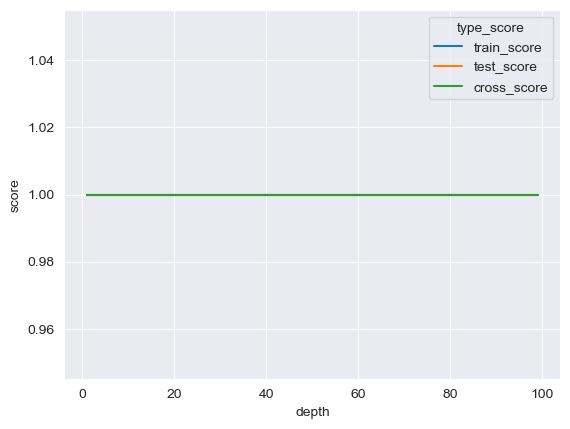

In [22]:
sns.lineplot(x="depth", y='score', hue="type_score", data=df_depth)

In [23]:
test_df = pd.read_json("dataset_209691_15.txt", encoding="UTF-8")

In [24]:
test_df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,31,37.2,1,1,0
1,24,28.8,1,1,0
2,28,33.6,1,1,0
3,25,30.0,1,1,0
4,25,30.0,1,1,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,12,4.8,1,0,1
97,12,4.8,1,0,1
98,7,2.8,0,0,1


In [25]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
ans = pd.DataFrame(clf.predict(test_df))

In [30]:
ans.value_counts()

собачка    59
котик      41
dtype: int64